In [1]:
%pylab inline
import mentari_v2 as mtr
import h5py
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
filter_list = ['WISE_W1']
z = 0.02
dirname_out = 'output_app/'
dirname_in = 'output_app/'
z_in = [0.02]
z_out = [0.02]
firstfile = 0
lastfile = 7
name_input = 'mentari_output_z'
name_output = 'mentari_mag_'
ext = '.hdf5'
file_input = []
file_output = []
for j in range(len(z_in)):
    for i in range(firstfile, lastfile+1):
        file_input.append(dirname_in + name_input + str(z_in[j]) + '-' + str(i) + ext)
        file_output.append(dirname_out + name_output + str(z_out[j]) + '_' + str(i) + ext)

In [ ]:
for i in range(len(file_input)):
    with h5py.File(file_input[i], 'r') as f:
        mass = np.array(f['StellarMass'])
        wavelength_m1 = np.array(f['Wavelength_m1'])
        spectra_m1 = np.array(f['Spectra_m1'])
        wavelength_s = np.array(f['Wavelength_stellar'])
        spectra_s = np.array(f['Spectra_stellar'])
    

    #file_output = 'mentari_mag'
    #print(file_output)
    if os.path.isfile(file_output[i]) == 0:
        mab_app = mtr.compute_mab(wavelength_m1, spectra_m1, filter_list, z)
        mab_abs = mtr.compute_mab(wavelength_m1, spectra_m1, filter_list, 0)

        with h5py.File(file_output[i], 'w') as f:
            f.create_dataset('stellarmass', data = mass)
            f.create_dataset('apparent', data = mab_app)
            f.create_dataset('absolut', data = mab_abs)

In [9]:
dirname = 'output_app/'
filename = 'mag_test_0.02_'
ext = '.hdf5'
firstfile = 0
lastfile = 1
mass = []
m_app = []
m_abs = []
filter_list = ['WISE_W1']
for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext

    with h5py.File(file, 'r') as f:
        stellarmass = f['stellarmass']
        m1 = f['apparent']
        m2 = f['absolut']
        for j in range(len(filter_list)):
            mass.extend(stellarmass)
            m_app.extend(m1[j])
            m_abs.extend(m2[j])

In [ ]:
m_app = []
m_abs = []
with h5py.File(file, 'r') as f:
    m1 = f['apparent']
    m2 = f['absolut']
    for j in range(len(filter_list)):
        m_app.extend(m1[j])
        m_abs.extend(m2[j])

In [11]:
Hubble_h=0.73
BoxSize = ((62.5**3) * (8/8))**(1/3)
volume = (BoxSize/Hubble_h)**3

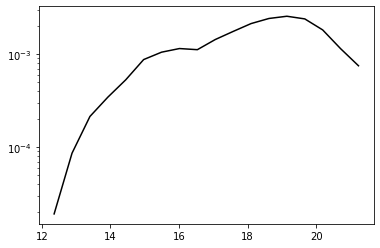

In [12]:
mi = min(m_app)
ma = 21.5
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_app, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

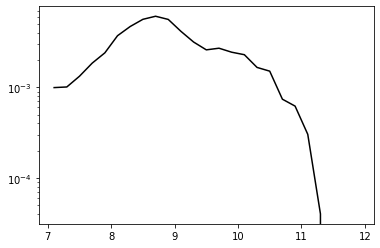

In [13]:
mi = 7
ma = 12
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(np.log10(mass), range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

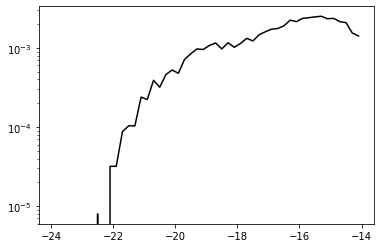

In [19]:
mi = -24
ma = -14
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_abs, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

In [ ]:
len(mass), len(m_app), len(m_abs)

In [ ]:
w = np.where(mass)> 0.0)[0]
w

In [ ]:
mass.flatten

In [6]:
file_input = 'output_app/mentari_output_z0.02-0.hdf5'
print(file_input)
with h5py.File(file_input, 'r') as f:
    mass = list(f['StellarMass'])
    print(mass)

output_app/mentari_output_z0.02-0.hdf5
[38553264387.73666, 63249185906.27141, 12398965403.43536, 65692628210.145546, 26905425308.219177, 26584575068.150684, 11199150326.027397, 4645011516.35274, 15817160645.483734, 9378999308.047945, 10123921802.054794, 3068379099.8662243, 8529985250.016053, 3862181305.222603, 6018134457.534246, 13473949636.81507, 5807673185.079998, 2112633131.8493152, 5208352943.493151, 4410377734.760274, 2692668585.2967143, 9403879852.054794, 3813806412.3287673, 7930988407.962329, 1381748614.5333905, 3004049206.1162243, 2246851900.941781, 2052222868.535959, 2601332551.519692, 3024504361.30137, 765597361.6652397, 2270735245.863656, 1355032719.0817637, 399822365.02568495, 817083568.0543665, 319184208.2522131, 3067049342.6343107, 853142549.7431507, 3930460413.5815763, 429921293.4931507, 585706501.8835616, 531914304.32363015, 1020448242.2675041, 373514265.239726, 599584662.3662243, 1996985115.5928938, 400920960.04922944, 144369006.84931508, 119141.74871575343, 277050596.